In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [4]:
df = pd.read_csv("homeprices.csv")
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0, 0.5, 'prices (USD)')

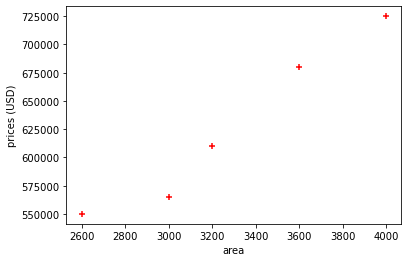

In [6]:
plt.scatter(df.area, df.price, color='red', marker='+')
plt.xlabel("area")
plt.ylabel("prices (USD)")

In [14]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [15]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [16]:
#Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df, price)

LinearRegression()

##### (1) Predict the price of a home with area = 3300 sqrt ft

In [17]:
reg.predict([[3300]])

array([628715.75342466])

In [18]:
reg.coef_

array([135.78767123])

In [19]:
reg.intercept_

180616.43835616432

#### Y = m * X + b (m is coefficient and b is intercept)

In [25]:
y = 135.78767123*3300 + 180616.43835616432
y

628715.7534151643

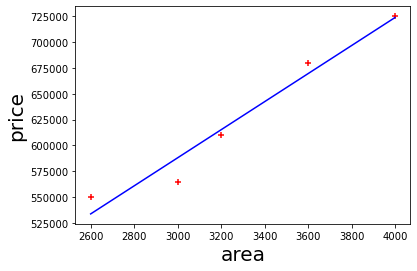

In [38]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker= '+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

##### (2) Predict the price of a home with area = 5000 sqrt ft

In [26]:
reg.predict([[5000]])

array([859554.79452055])

#### Generate CSV file with list of home price predictions

In [29]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [30]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [33]:
#adding the column price to the area table
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


#### Merge the table to a csv file

In [34]:
area_df.to_csv("prediction.csv")